## Object Detection

In [13]:
import boto3
import numpy as np
import json
import matplotlib.patches as patches
from matplotlib import pyplot as plt
from PIL import Image
from PIL import ImageColor
from IPython.core.display import HTML

In [5]:
region = boto3.Session().region_name
s3_bucket = f"jumpstart-cache-prod-{region}"
key_prefix = "inference-notebook-assets"
s3 = boto3.client("s3")

In [6]:
def download_from_s3(key_filenames):
    for key_filename in key_filenames:
        s3.download_file(s3_bucket, f"{key_prefix}/{key_filename}", key_filename)

In [7]:
img_jpg = "Naxos_Taverna.jpg"
download_from_s3(key_filenames=[img_jpg])

In [8]:
HTML('<img src="Naxos_Taverna.jpg" alt="Naxos_Taverna" style="height: 600px;"/>'
     '<figcaption>Naxos_Taverna.jpg</figcaption>The image has been downloaded from '
     'https://commons.wikimedia.org/wiki/File:Naxos_Taverna.jpg, '
     '<a href="https://en.wikipedia.org/wiki/GNU_Free_Documentation_License">License</a>')

In [14]:
def query_endpoint(input_img):
    endpoint_name = 'jumpstart-dft-mx-od-ssd-512-mobilen-20240202-135335'
    client = boto3.client('runtime.sagemaker')
    response = client.invoke_endpoint(EndpointName=endpoint_name, ContentType='application/x-image', Body=input_img, Accept='application/json;verbose;n_predictions=20')
    # If we remove ';n_predictions=20' from Accept, we get all the predicted boxes.  
    model_predictions = json.loads(response['Body'].read())
    return model_predictions

In [15]:
def parse_response(model_predictions):    
    normalized_boxes, classes, scores, labels = model_predictions['normalized_boxes'], model_predictions['classes'], model_predictions['scores'], model_predictions['labels']
    # Substitute the classes index with the classes name
    class_names = [labels[int(idx)] for idx in classes]
    return normalized_boxes, class_names, scores

In [16]:
with open(img_jpg, 'rb') as file: input_img = file.read()
best_results_per_input = parse_response(query_endpoint(input_img))
colors = list(ImageColor.colormap.values())

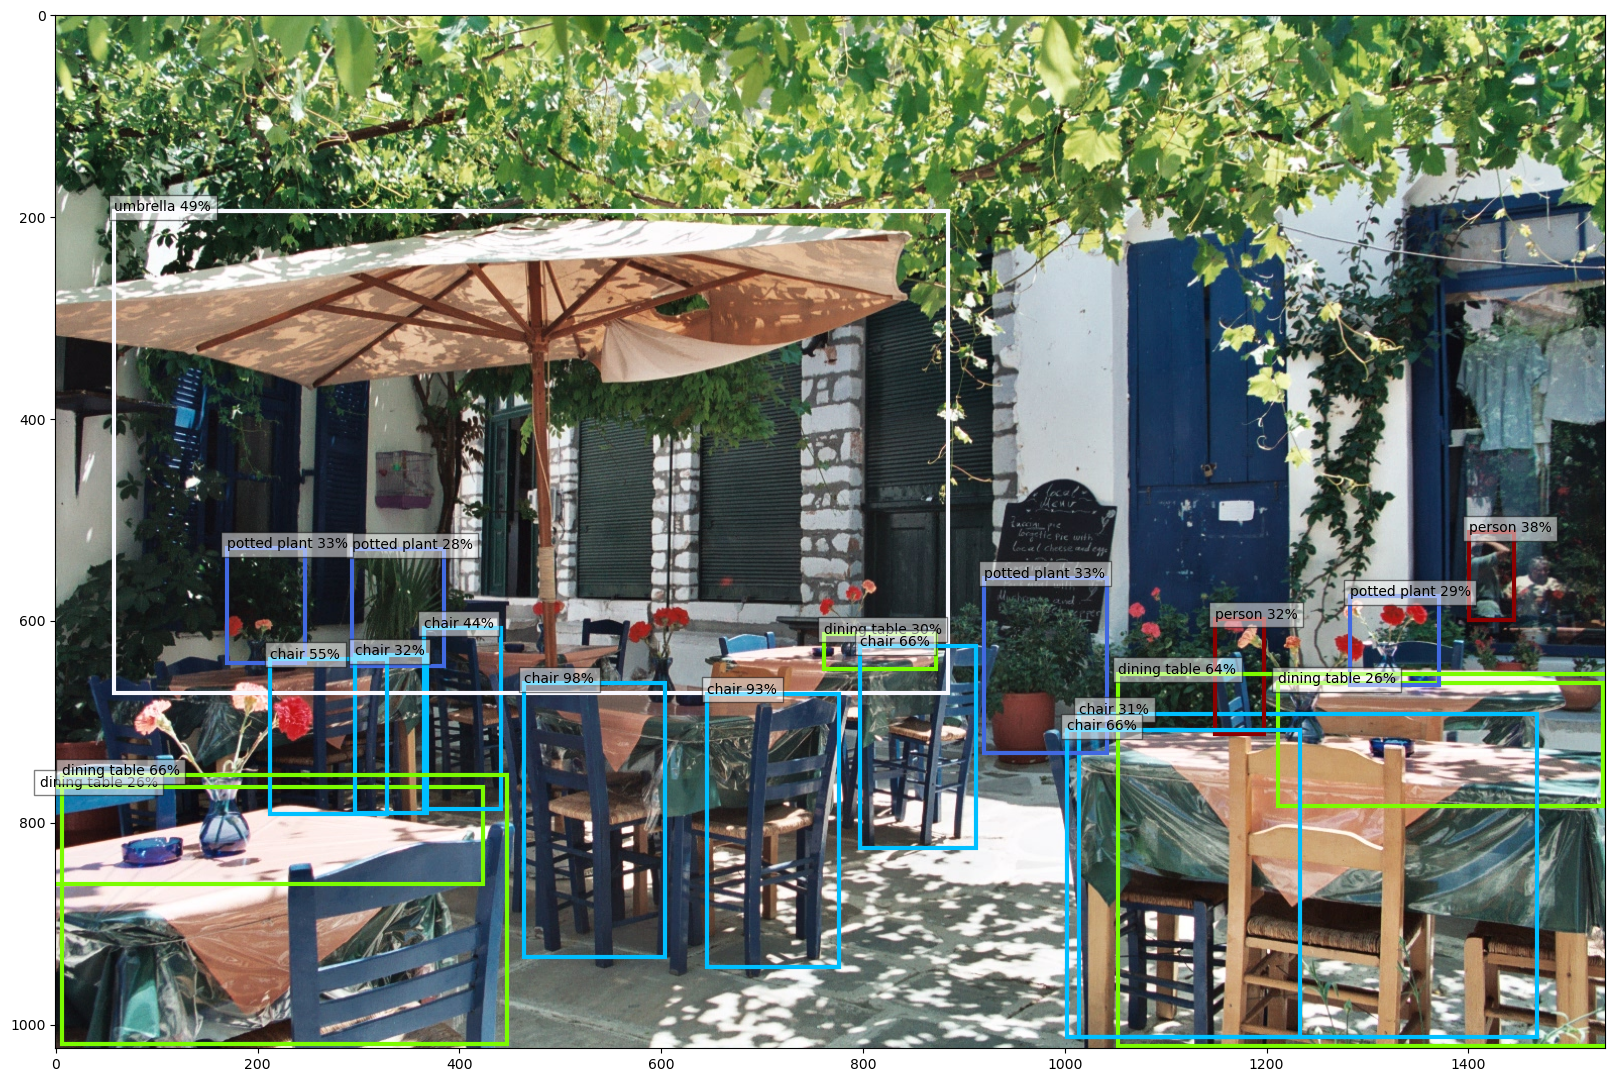

In [19]:
image_np = np.array(Image.open(img_jpg))
plt.figure(figsize=(20,20))
ax = plt.axes()
ax.imshow(image_np)
normalized_boxes, classe_names, confidences = best_results_per_input

for idx in range(len(normalized_boxes)):
    left, bot, right, top = normalized_boxes[idx]
    x, w = [val * image_np.shape[1] for val in [left, right - left]]
    y, h = [val * image_np.shape[0] for val in [bot, top - bot]]
    color = colors[hash(classe_names[idx]) % len(colors)]
    rect = patches.Rectangle((x, y), w, h, linewidth=3, edgecolor=color, facecolor='none')
    ax.add_patch(rect)
    ax.text(x, y, "{} {:.0f}%".format(classe_names[idx], confidences[idx]*100), bbox=dict(facecolor='white', alpha=0.5))

plt.show()

In [21]:
!wget https://selfdriving5.github.io/udacity/Self-Driving%20Car%20Engineer%20v5.0.0%28us%29/Part%2003-Module%2001-Lesson%2001_Object%20Detection/img/bbox-example-image.jpg

--2024-02-02 14:05:07--  https://selfdriving5.github.io/udacity/Self-Driving%20Car%20Engineer%20v5.0.0%28us%29/Part%2003-Module%2001-Lesson%2001_Object%20Detection/img/bbox-example-image.jpg
Resolving selfdriving5.github.io (selfdriving5.github.io)... 185.199.110.153, 185.199.109.153, 185.199.111.153, ...
Connecting to selfdriving5.github.io (selfdriving5.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220503 (215K) [image/jpeg]
Saving to: ‘bbox-example-image.jpg’

bbox-example-image. 100%[===================>] 215.33K  --.-KB/s    in 0.003s  

2024-02-02 14:05:07 (77.8 MB/s) - ‘bbox-example-image.jpg’ saved [220503/220503]



In [26]:
img_jpg = "bbox-example-image.jpg"

In [23]:
HTML('<img src="bbox-example-image.jpg" alt="Naxos_Taverna" style="height: 600px;"/>')

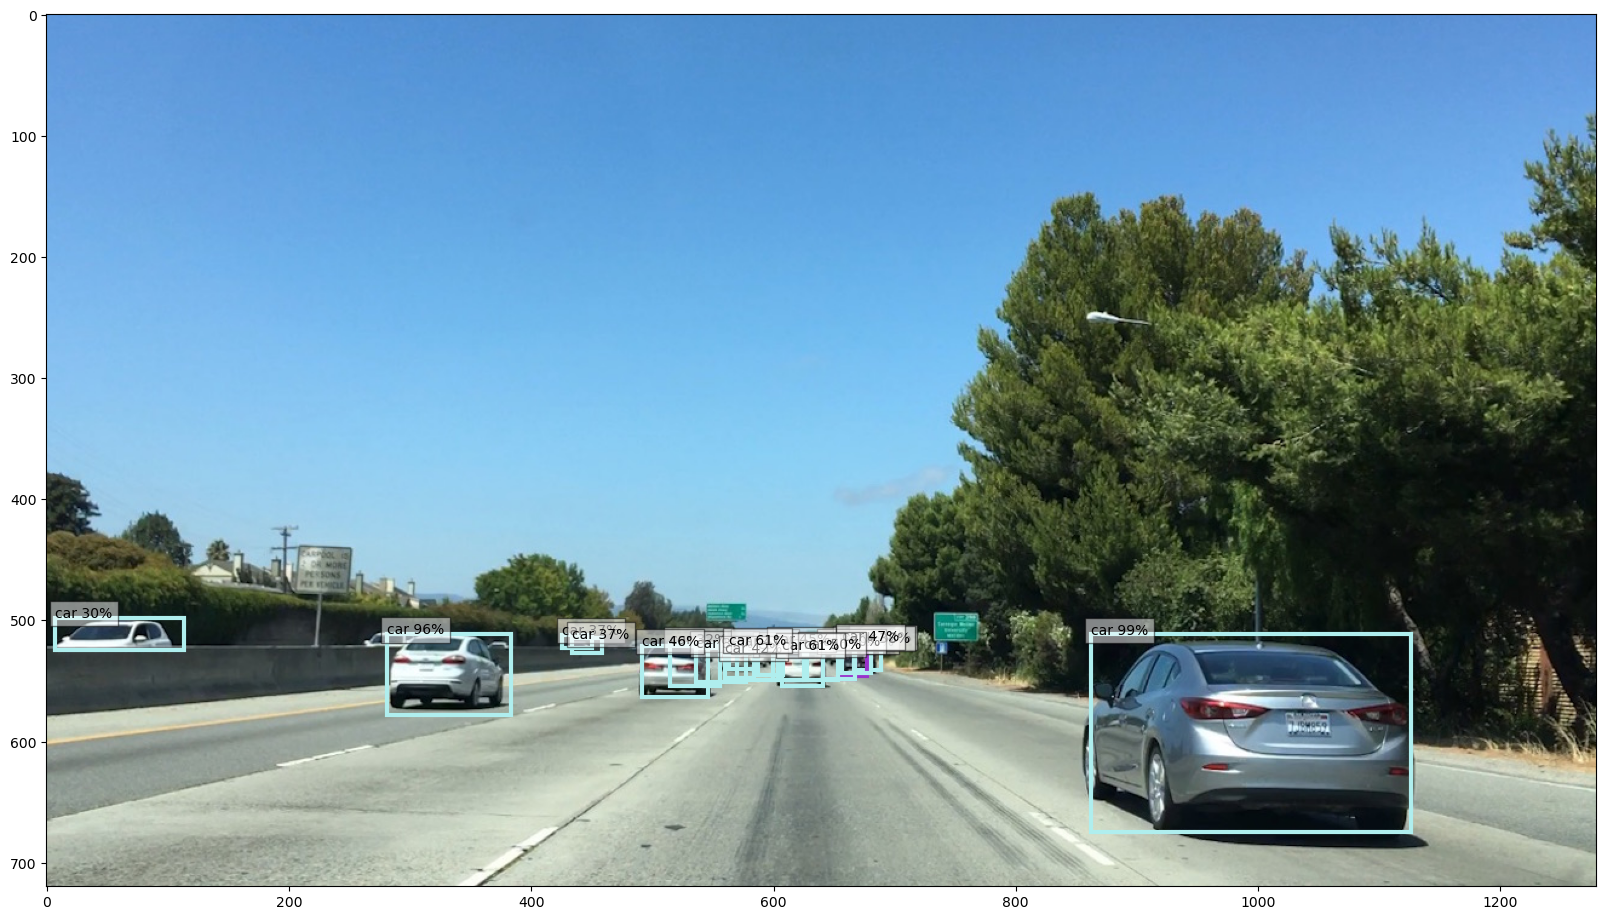

In [30]:
with open(img_jpg, 'rb') as file: input_img = file.read()
best_results_per_input = parse_response(query_endpoint(input_img))
colors = list(ImageColor.colormap.values())

image_np = np.array(Image.open(img_jpg))
plt.figure(figsize=(20,20))
ax = plt.axes()
ax.imshow(image_np)
normalized_boxes, classe_names, confidences = best_results_per_input
car_count = 0

for idx in range(len(normalized_boxes)):
    left, bot, right, top = normalized_boxes[idx]
    x, w = [val * image_np.shape[1] for val in [left, right - left]]
    y, h = [val * image_np.shape[0] for val in [bot, top - bot]]
    color = colors[hash(classe_names[idx]) % len(colors)]
    rect = patches.Rectangle((x, y), w, h, linewidth=3, edgecolor=color, facecolor='none')
    ax.add_patch(rect)
    ax.text(x, y, "{} {:.0f}%".format(classe_names[idx], confidences[idx]*100), bbox=dict(facecolor='white', alpha=0.5))
    if classe_names[idx] == "car":
        car_count += 1

plt.show()

In [32]:
print(f"Total of cars: {car_count}")

Total of cars: 18


In [33]:
!wget https://static.javatpoint.com/python/images/object-recognition-using-python.jpg

--2024-02-02 14:13:49--  https://static.javatpoint.com/python/images/object-recognition-using-python.jpg
Resolving static.javatpoint.com (static.javatpoint.com)... 172.67.207.221, 104.21.22.242, 2606:4700:3032::6815:16f2, ...
Connecting to static.javatpoint.com (static.javatpoint.com)|172.67.207.221|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 243990 (238K) [image/jpeg]
Saving to: ‘object-recognition-using-python.jpg’

object-recognition- 100%[===================>] 238.27K  --.-KB/s    in 0.01s   

2024-02-02 14:13:50 (16.3 MB/s) - ‘object-recognition-using-python.jpg’ saved [243990/243990]



In [34]:
img_jpg = "object-recognition-using-python.jpg"

In [35]:
HTML(f'<img src="{img_jpg}" alt="Naxos_Taverna" style="height: 600px;"/>')

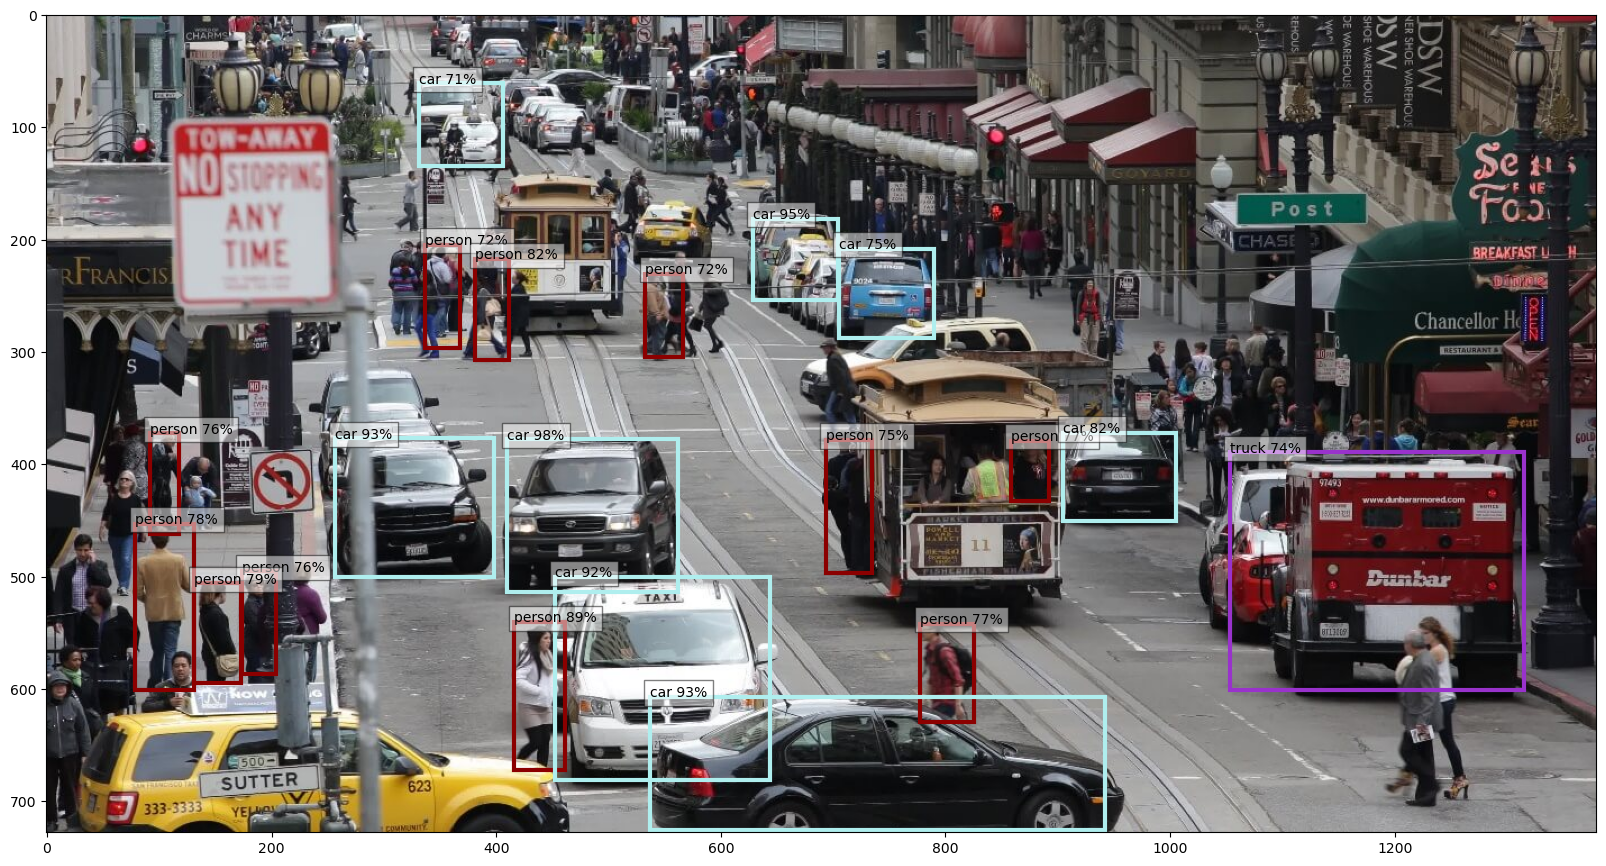

In [36]:
with open(img_jpg, 'rb') as file: input_img = file.read()
best_results_per_input = parse_response(query_endpoint(input_img))
colors = list(ImageColor.colormap.values())

image_np = np.array(Image.open(img_jpg))
plt.figure(figsize=(20,20))
ax = plt.axes()
ax.imshow(image_np)
normalized_boxes, classe_names, confidences = best_results_per_input
car_count = 0

for idx in range(len(normalized_boxes)):
    left, bot, right, top = normalized_boxes[idx]
    x, w = [val * image_np.shape[1] for val in [left, right - left]]
    y, h = [val * image_np.shape[0] for val in [bot, top - bot]]
    color = colors[hash(classe_names[idx]) % len(colors)]
    rect = patches.Rectangle((x, y), w, h, linewidth=3, edgecolor=color, facecolor='none')
    ax.add_patch(rect)
    ax.text(x, y, "{} {:.0f}%".format(classe_names[idx], confidences[idx]*100), bbox=dict(facecolor='white', alpha=0.5))
    if classe_names[idx] == "car":
        car_count += 1

plt.show()